In [1]:
#loading classes and packages
import pandas as pd
import numpy as np
import seaborn as sns
import shapely
import plotly.graph_objects as go
import plotly.express as px
color_pal=sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from math import sqrt
from sklearn import preprocessing
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder


In [2]:
#using pandas class to read weather dataset and then displaying few records
weather = pd.read_csv('Weather.csv')
weather

,country_x,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,...,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
0,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,8.2,3.0,17.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,5.4,NaN,8.5,25.7,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,25.9,18.1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,12.4,5.6,19.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50690,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,16.6,30.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50691,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,19.0,14.5,23.3,3.0,NaN,NaN,NaN,NaN,NaN,NaN
50692,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,4.6,26.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50693,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,13.0,2.2,18.9,0.3,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#finding mean and other metrics from dataset numeric values to know the average values of each column
weather.describe()

,population,area,capital_lat,capital_lng,latitude,longitude,avg_temp_c,min_temp_c,max_temp_c,precipitation_mm,snow_depth_mm,avg_wind_dir_deg,avg_wind_speed_kmh,peak_wind_gust_kmh,avg_sea_level_pres_hpa,sunshine_total_min
count,4.980700e+04,5.040000e+04,50551.000000,50551.000000,50695.000000,50695.000000,39186.000000,40232.000000,40526.000000,38702.000000,6387.000000,6394.000000,9764.000000,2060.000000,7428.000000,1888.000000
mean,1.332631e+08,3.103302e+06,28.508285,22.899903,28.051013,23.909099,15.718570,9.953539,20.165259,2.713178,86.894630,184.841101,12.532681,37.947233,1014.997240,355.237818
std,2.933153e+08,5.177411e+06,25.874801,61.359058,26.016675,65.085954,12.021833,11.597173,12.474395,9.579809,377.217203,104.330023,7.024644,18.027725,7.937033,282.964691
min,3.000000e+01,2.020000e+00,-54.283545,-176.174022,-54.790003,-176.174022,-58.700000,-61.200000,-52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,972.700000,0.000000
25%,9.737521e+06,2.383910e+05,13.524834,-1.527094,12.450414,-1.909972,8.300000,2.700000,12.000000,0.000000,0.000000,91.000000,7.500000,25.900000,1010.300000,54.000000
50%,3.870000e+07,6.037000e+05,38.894986,27.478222,37.129761,25.607160,17.800000,11.100000,22.200000,0.000000,0.000000,195.000000,11.100000,35.300000,1014.700000,348.000000
75%,1.197132e+08,2.724900e+06,48.208354,58.387426,47.369997,67.770013,25.700000,19.400000,30.300000,1.100000,20.000000,271.000000,15.900000,46.100000,1019.700000,605.000000
max,1.367110e+09,1.712444e+07,78.223156,179.118650,78.216684,179.216647,43.300000,36.000000,58.000000,482.100000,7140.000000,360.000000,67.600000,226.800000,1050.800000,930.000000


In [4]:
weather.isnull().sum()

country_x                     0
native_name                 106
iso2                        209
iso3                          0
population                  888
area                        295
capital                     144
capital_lat                 144
capital_lng                 144
region                      817
continent                   711
station_id_x                  0
city_name                    25
country_y                     0
state                      1120
latitude                      0
longitude                     0
station_id_y                  0
date                          0
season                        0
avg_temp_c                11509
min_temp_c                10463
max_temp_c                10169
precipitation_mm          11993
snow_depth_mm             44308
avg_wind_dir_deg          44301
avg_wind_speed_kmh        40931
peak_wind_gust_kmh        48635
avg_sea_level_pres_hpa    43267
sunshine_total_min        48807
dtype: int64

In [5]:
weather['native_name'] = weather.apply(lambda row: row['country_x'] if pd.isnull(row['native_name']) else row['native_name'], axis=1)

In [6]:
weather['iso2'] = weather.apply(lambda row: row['iso3'] if pd.isnull(row['iso2']) else row['iso2'], axis=1)

In [7]:
Total_population = weather['population'].mean()
weather['population'].fillna(Total_population, inplace=True)

In [8]:
weather['capital'] = weather.apply(lambda row: row['country_x'] if pd.isnull(row['capital']) else row['capital'], axis=1)

In [9]:
mean_capital_lat = weather['capital_lat'].mean()
weather['capital_lat'].fillna(mean_capital_lat, inplace=True)

In [10]:
mean_capital_lng = weather['capital_lng'].mean()
weather['capital_lng'].fillna(mean_capital_lng, inplace=True)

In [11]:
weather['city_name'] = weather.apply(lambda row: row['country_x'] if pd.isnull(row['city_name']) else row['city_name'], axis=1)

In [12]:
weather['state'] = weather.apply(lambda row: row['iso3'] if pd.isnull(row['state']) else row['state'], axis=1)

In [13]:
mean_area = weather['area'].mean()
weather['area'].fillna(mean_area, inplace=True)

In [14]:
weather['region'] = weather.apply(lambda row: row['country_y'] if pd.isnull(row['region']) else row['region'], axis=1)

In [15]:
weather['continent'] = weather.apply(lambda row: row['country_y'] if pd.isnull(row['continent']) else row['continent'], axis=1)

In [16]:
mean_avg_temp = weather['avg_temp_c'].mean()
weather['avg_temp_c'].fillna(mean_avg_temp, inplace=True)

In [17]:
min_temp = weather['min_temp_c'].mean()
weather['min_temp_c'].fillna(min_temp, inplace=True)

In [18]:
weather['max_temp_c'].interpolate(method='linear', inplace=True)

In [19]:
weather['precipitation_mm'].interpolate(method='ffill', inplace=True)

In [20]:
weather['snow_depth_mm'] = pd.to_numeric(weather['snow_depth_mm'], errors='coerce')
weather['snow_depth_mm'].fillna(0, inplace=True)
df1 = weather.groupby('country_x')['snow_depth_mm'].mean().sort_values(ascending=False).nlargest(20).reset_index()

In [21]:
avg_wind_dir = weather['avg_wind_dir_deg'].mean()
weather['avg_wind_dir_deg'].fillna(avg_wind_dir, inplace=True)

In [22]:
avg_wind_speed = weather['avg_wind_speed_kmh'].mean()
weather['avg_wind_speed_kmh'].fillna(avg_wind_speed, inplace=True)

In [23]:
peak_wind = weather['peak_wind_gust_kmh'].median()
weather['peak_wind_gust_kmh'].fillna(peak_wind, inplace = True)

In [24]:
avg_sea_level=weather['avg_sea_level_pres_hpa'].mean()
weather['avg_sea_level_pres_hpa'].fillna(avg_sea_level, inplace=True)

In [25]:
sunshine = weather['sunshine_total_min'].mean()
weather['sunshine_total_min'].fillna(sunshine, inplace = True)

In [26]:
weather.isnull().sum()

country_x                 0
native_name               0
iso2                      0
iso3                      0
population                0
area                      0
capital                   0
capital_lat               0
capital_lng               0
region                    0
continent                 0
station_id_x              0
city_name                 0
country_y                 0
state                     0
latitude                  0
longitude                 0
station_id_y              0
date                      0
season                    0
avg_temp_c                0
min_temp_c                0
max_temp_c                1
precipitation_mm          1
snow_depth_mm             0
avg_wind_dir_deg          0
avg_wind_speed_kmh        0
peak_wind_gust_kmh        0
avg_sea_level_pres_hpa    0
sunshine_total_min        0
dtype: int64

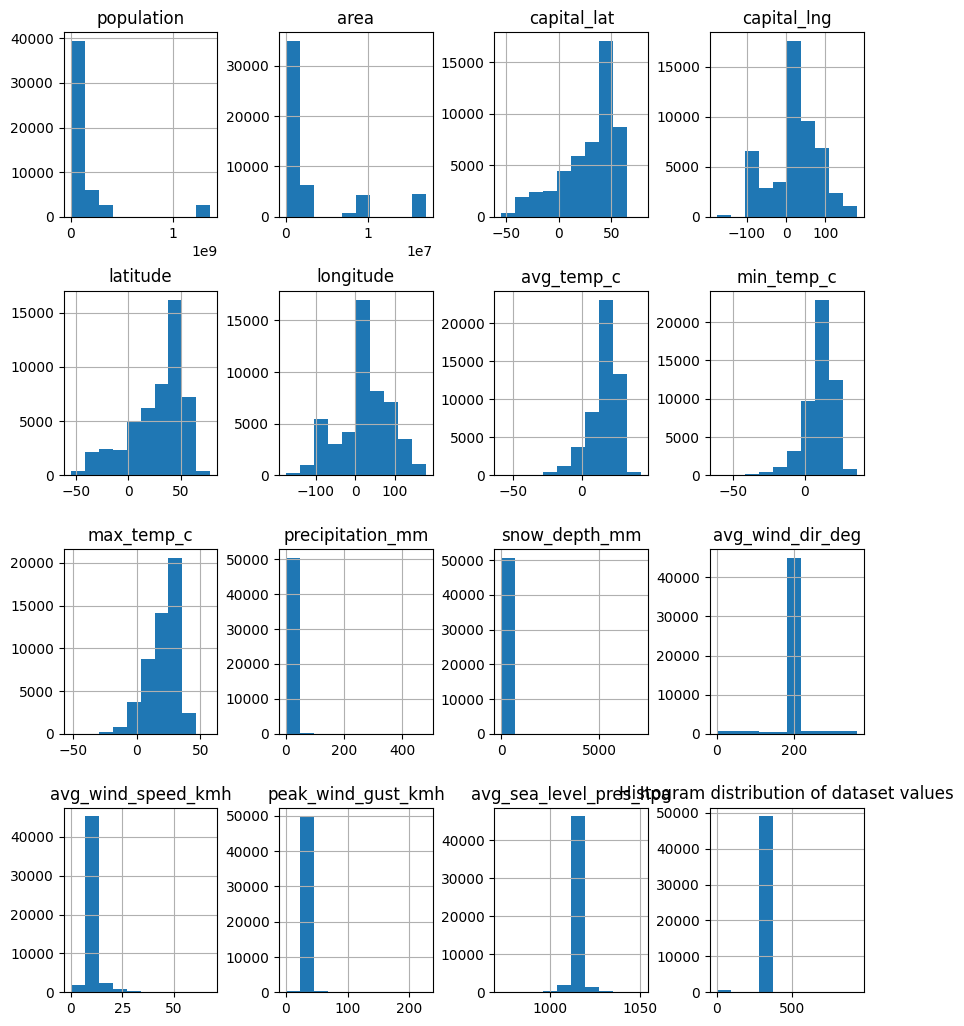

In [27]:
#visualizing distribution of numerical data in weather dataset
weather.hist(figsize=(10, 12))
plt.title("Histogram distribution of dataset values")
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

In [28]:
weather.isnull().sum()

country_x                 0
native_name               0
iso2                      0
iso3                      0
population                0
area                      0
capital                   0
capital_lat               0
capital_lng               0
region                    0
continent                 0
station_id_x              0
city_name                 0
country_y                 0
state                     0
latitude                  0
longitude                 0
station_id_y              0
date                      0
season                    0
avg_temp_c                0
min_temp_c                0
max_temp_c                1
precipitation_mm          1
snow_depth_mm             0
avg_wind_dir_deg          0
avg_wind_speed_kmh        0
peak_wind_gust_kmh        0
avg_sea_level_pres_hpa    0
sunshine_total_min        0
dtype: int64

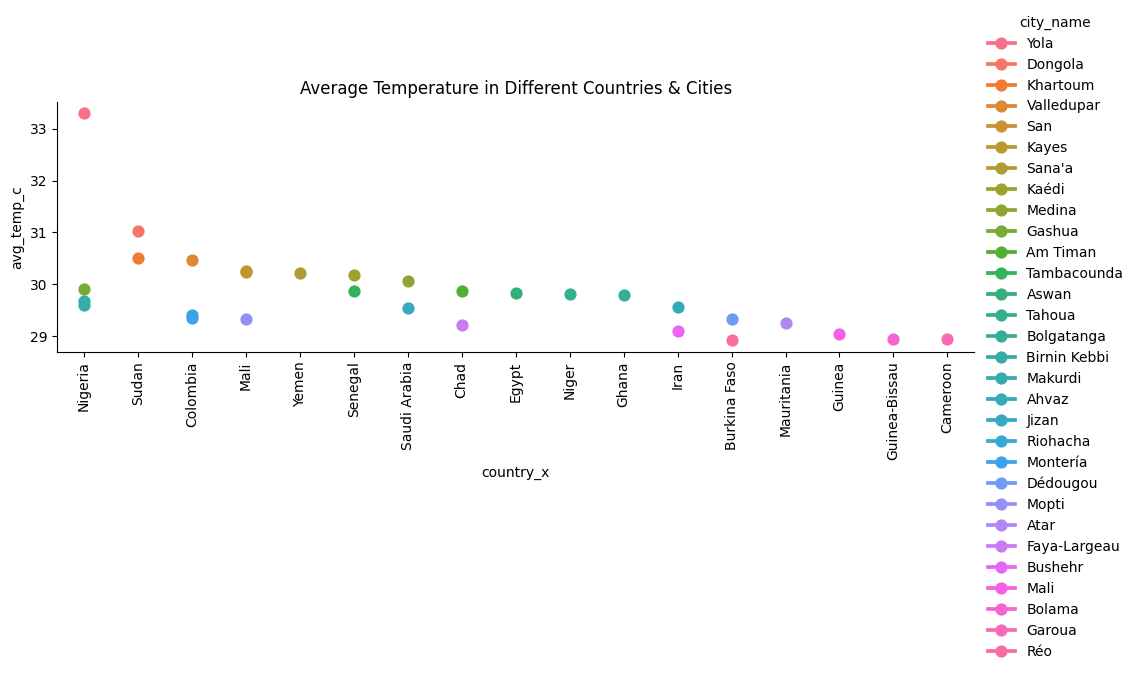

In [29]:
data = weather.groupby(['country_x', 'city_name'])['avg_temp_c'].mean().sort_values(ascending=False).nlargest(30).reset_index()
sns.catplot(x="country_x", y="avg_temp_c", hue='city_name', data=data, kind='point', height=5, aspect=2)
plt.title("Average Temperature in Different Countries & Cities")
plt.xticks(rotation=90)
plt.show()

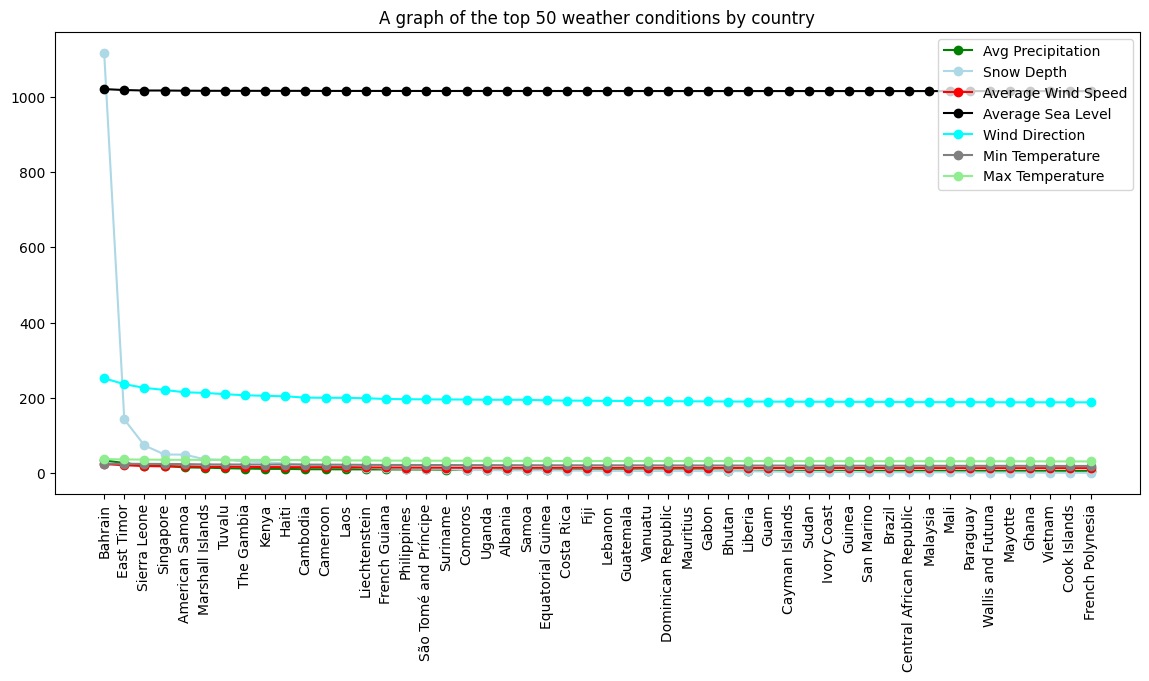

In [30]:
#plotting graph of various weather condition such as min and max temp, snow depth, wind speed and direction etc
df = weather.groupby('country_x')['precipitation_mm'].mean().sort_values(ascending=False).nlargest(50).reset_index()
df1 = weather.groupby('country_x')['snow_depth_mm'].mean().sort_values(ascending=False).nlargest(50).reset_index()
df2 = weather.groupby('country_x')['avg_wind_speed_kmh'].mean().sort_values(ascending=False).nlargest(50).reset_index()
df3 = weather.groupby('country_x')['avg_sea_level_pres_hpa'].mean().sort_values(ascending=False).nlargest(50).reset_index()
df4 = weather.groupby('country_x')['avg_wind_dir_deg'].mean().sort_values(ascending=False).nlargest(50).reset_index()
df5 = weather.groupby('country_x')['min_temp_c'].mean().sort_values(ascending=False).nlargest(50).reset_index()
df6 = weather.groupby('country_x')['max_temp_c'].mean().sort_values(ascending=False).nlargest(50).reset_index()
plt.figure(figsize=(14,6))
plt.plot(df['country_x'], df['precipitation_mm'], 'ro-', color = 'green')
plt.plot(df['country_x'], df1['snow_depth_mm'], 'ro-', color = 'lightblue')
plt.plot(df['country_x'], df2['avg_wind_speed_kmh'], 'ro-', color = 'red')
plt.plot(df['country_x'], df3['avg_sea_level_pres_hpa'], 'ro-', color = 'black')
plt.plot(df['country_x'], df4['avg_wind_dir_deg'], 'ro-', color = 'cyan')
plt.plot(df['country_x'], df5['min_temp_c'], 'ro-', color = 'grey')
plt.plot(df['country_x'], df6['max_temp_c'], 'ro-', color = 'lightgreen')
plt.title("A graph of the top 50 weather conditions by country")
plt.legend(['Avg Precipitation', 'Snow Depth', 'Average Wind Speed', 'Average Sea Level', 'Wind Direction', 'Min Temperature', 'Max Temperature'], loc='upper right')
plt.xticks(rotation=90)
plt.show()

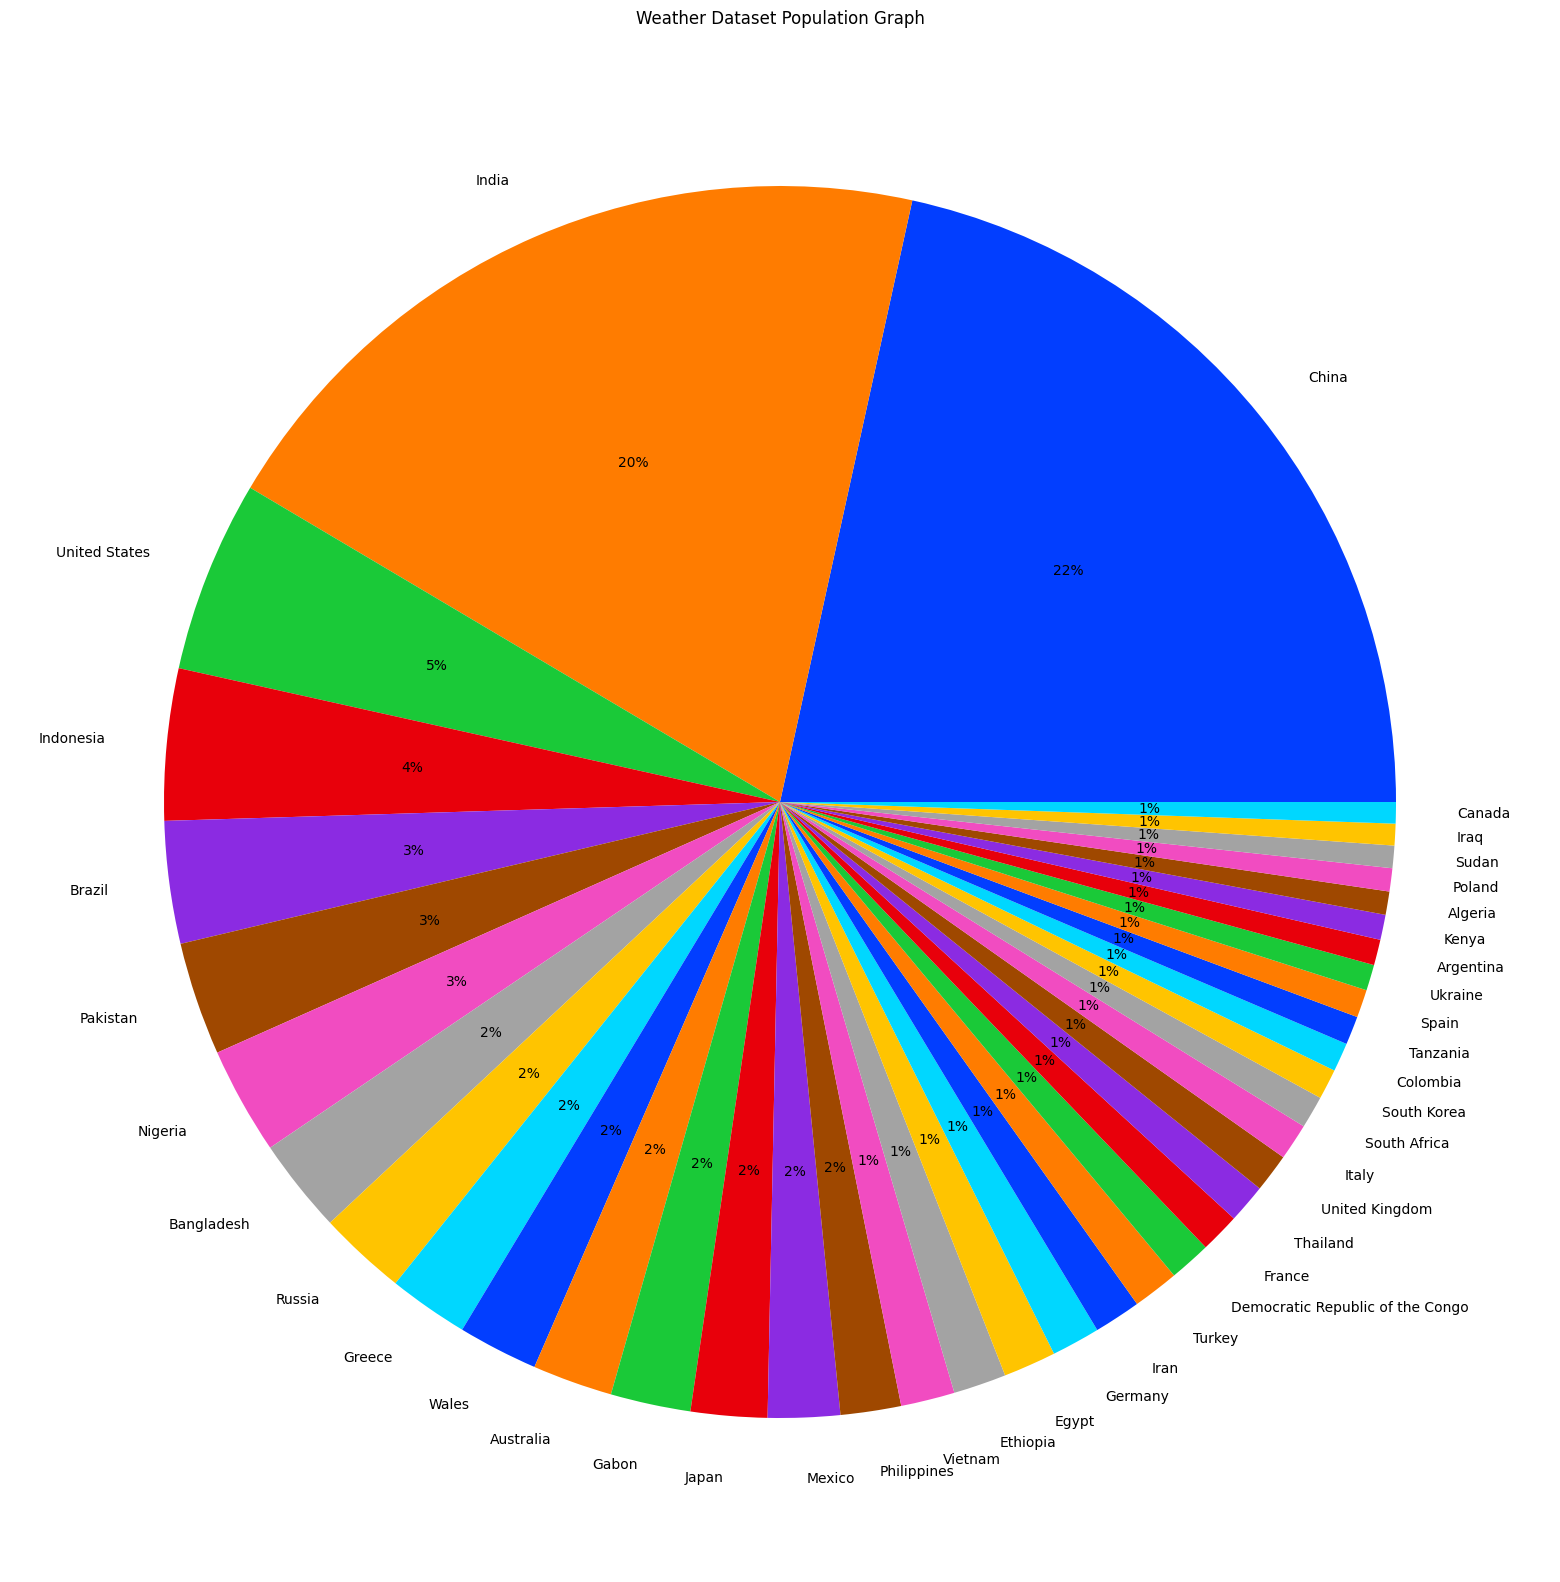

In [31]:
df = weather.groupby('country_x')['population'].mean().sort_values(ascending=False).nlargest(40).reset_index()
plt.figure(figsize=(20,20))
palette_color = sns.color_palette('bright')
plt.pie(df['population'].ravel(),labels=df['country_x'].ravel(),colors=palette_color, autopct='%.0f%%')
plt.title("Weather Dataset Population Graph")
plt.show()

In [32]:
#reading storm dataset
storm = pd.read_csv("StormEvents_2011_20230417.csv")
storm

,YEARMONTH,EPISODE_ID,EVENT_ID,LOCATION_INDEX,RANGE,AZIMUTH,LOCATION,latitude,longitude,LAT2,LON2
0,201104,48862,285976,1,0.57,E,GILLHAM,34.1700,-94.3100,3410200,9418600
1,201104,48862,285978,1,2.39,ESE,CENTER PT,34.0200,-93.8900,341200,9353400
2,201104,48862,285979,1,0.00,N,DE QUEEN,34.0300,-94.3300,341800,9419800
3,201104,48862,285980,1,0.90,NW,DE QUEEN,34.0400,-94.3400,342400,9420400
4,201104,48862,285981,1,0.57,E,DIAN,33.8000,-93.3900,3348000,9323400
...,...,...,...,...,...,...,...,...,...,...,...
82194,201108,56736,344803,1,1.51,NW,CANAAN,42.0479,-73.3468,422874,7320808
82195,201108,56737,366820,3,0.94,SW,OTIS,42.1894,-73.0914,4211364,735484
82196,201108,56738,343085,4,1.01,NE,GUILFORD CENTER,42.8108,-72.6066,4248648,7236396
82197,201108,56738,344771,4,1.25,SE,BENNINGTON,42.8662,-73.1841,4251972,7311046


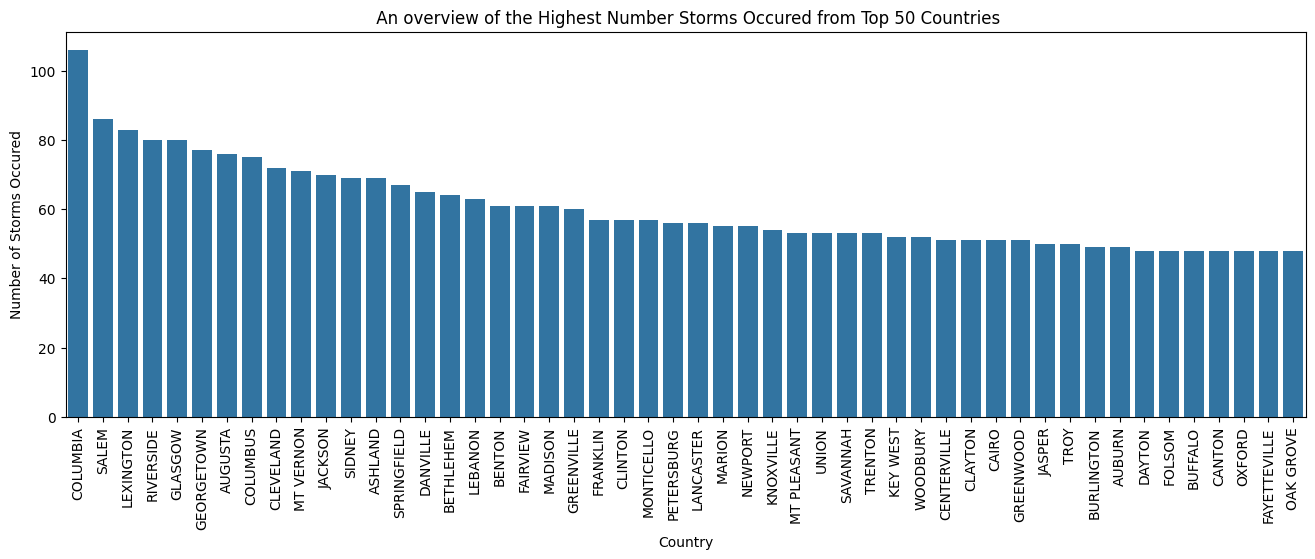

In [33]:
#plotting graph of various weather condition such as min and max temp, snow depth, wind speed and direction etc
df = storm.groupby('LOCATION')['YEARMONTH'].count().sort_values(ascending=False).nlargest(50).reset_index()
plt.figure(figsize=(16,5))
df = df.values
temp = []
for i in range(len(df)):
    temp.append([df[i,0], df[i,1]])
temp = pd.DataFrame(temp, columns=['Country','Number of Storms Occured'])    
sns.barplot(x='Country',y='Number of Storms Occured', data=temp)
plt.title(' An overview of the Highest Number Storms Occured from Top 50 Countries')
plt.xticks(rotation=90)
plt.show()

In [34]:
#LOADING & DISPLAYING ANNUAL EMISSION Dataset for Air Quality processing
emission = pd.read_csv("annual-co2-emissions-per-country.csv")
emission

,country_x,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
31344,Zimbabwe,ZWE,2017,9596071.0
31345,Zimbabwe,ZWE,2018,11795478.0
31346,Zimbabwe,ZWE,2019,11114607.0
31347,Zimbabwe,ZWE,2020,10607897.0


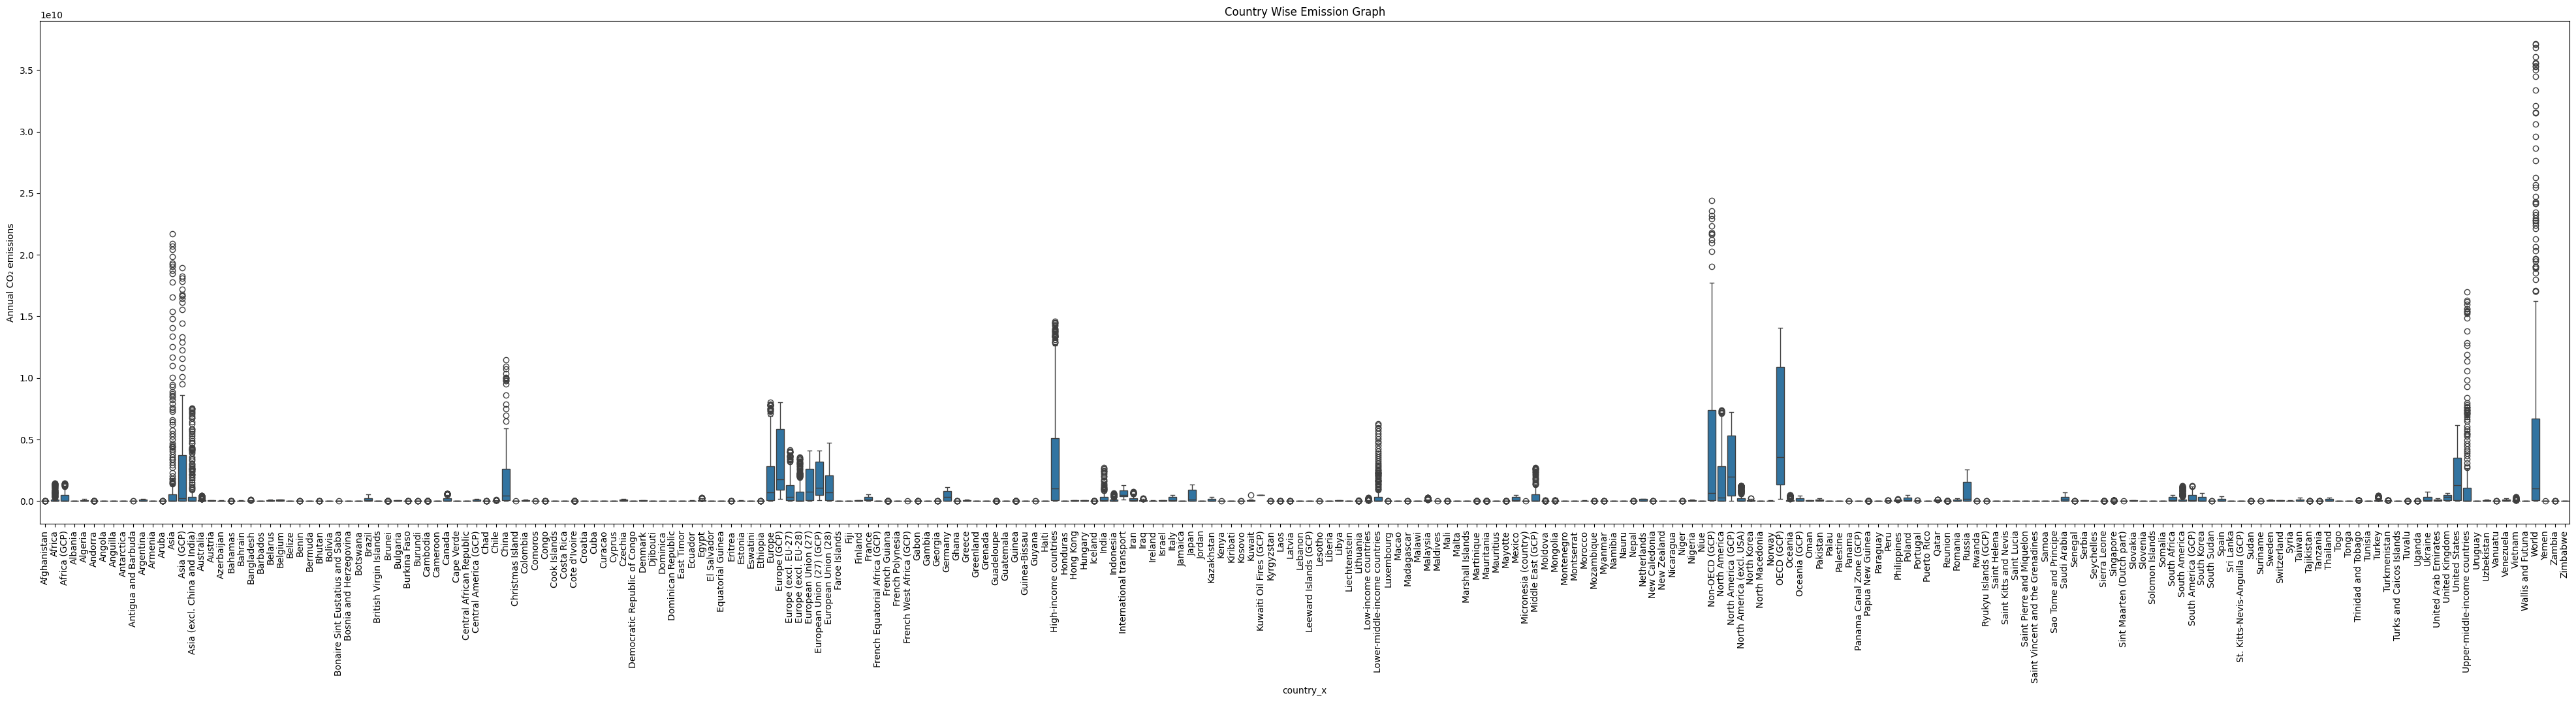

In [35]:
#plotting graph of average emission country-wise
fig, ax = plt.subplots(figsize=(50,10))
sns.boxplot(data=emission.iloc[:], x="country_x", y="Annual CO₂ emissions")
plt.xticks(rotation=90)
plt.title("Country Wise Emission Graph")
plt.show()

In [36]:
#LOADING & DISPLAYING EARTHQUAKE DATASET
earthquake = pd.read_csv("Eartquakes-1990-2023.csv")
earthquake

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3445746,1690626851941,"5 km NW of Chikusei, Japan",reviewed,0,326,earthquake,4.60,Japan,139.940200,36.350700,83.039,2023-07-29 10:34:11.941000+00:00
3445747,1690626975715,"Kodiak Island region, Alaska",automatic,0,44,earthquake,1.70,Alaska,-153.729900,57.790100,24.400,2023-07-29 10:36:15.715000+00:00
3445748,1690627215940,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,0,90,earthquake,2.42,B.C.,-115.296833,32.233167,1.770,2023-07-29 10:40:15.940000+00:00
3445749,1690628146040,"7 km W of Cobb, CA",automatic,0,16,earthquake,1.03,California,-122.800499,38.827499,1.720,2023-07-29 10:55:46.040000+00:00


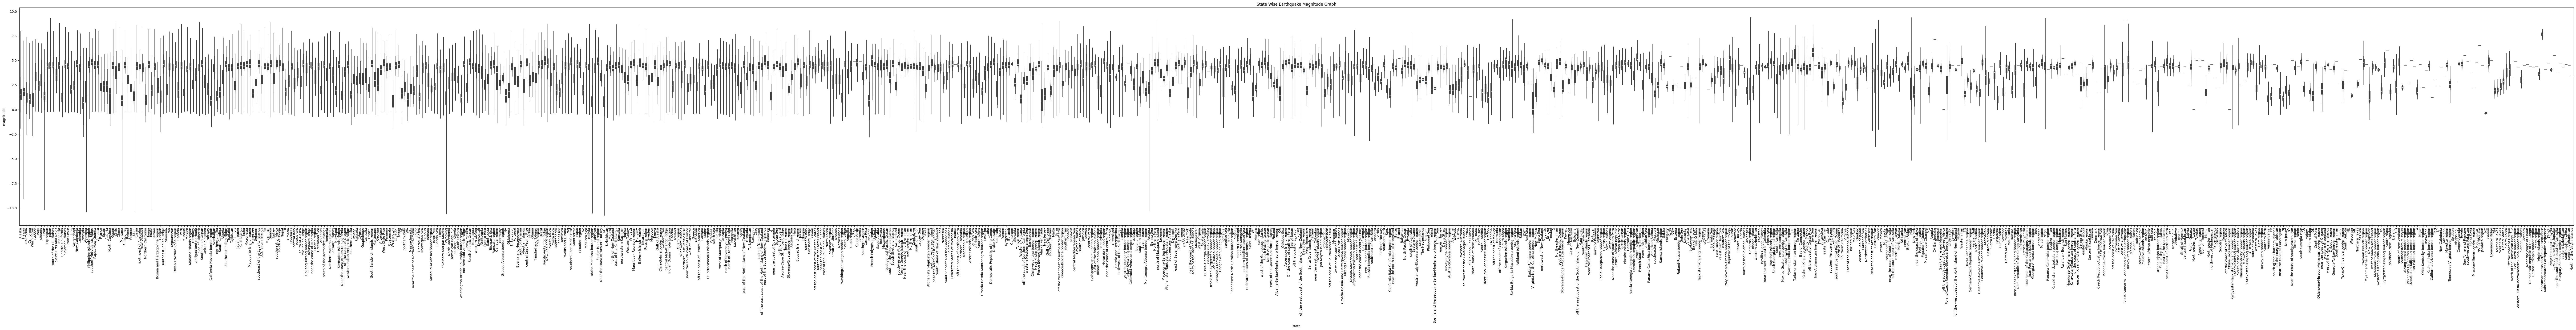

In [37]:
#plotting graph of state-wise earthquake magnitude
fig, ax = plt.subplots(figsize=(140, 12))
sns.violinplot(data=earthquake.iloc[:], x="state", y="magnitudo")
plt.xticks(rotation=90)
plt.title("State Wise Earthquake Magnitude Graph")
plt.show()

In [38]:
#MERGING ALL DATASETS BASED ON COMMON COLUMNS
weather_storm = pd.merge(weather, storm, on = ["latitude"], how='left')
weather_storm_emisson = pd.merge(weather_storm, emission, on = ["country_x"], how='left')
weather_storm_emisson_quake = pd.merge(weather_storm_emisson, earthquake, on = ["latitude"], how='left')
print("Dataset After Merging Based on Common Columns")
print()
weather_storm_emisson_quake

Dataset After Merging Based on Common Columns



,country_x,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,...,place,status,tsunami,significance,data_type,magnitudo,state_y,longitude,depth,date_y
0,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,افغانستان,AF,AFG,26023100.0,652230.0,Kabul,34.526011,69.177684,Southern and Central Asia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190843,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7190844,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7190845,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7190846,Zimbabwe,Zimbabwe,ZW,ZWE,13061239.0,390757.0,Harare,-17.831773,31.045686,Eastern Africa,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#now apply the pre-processing technique to clean the dataset such as removing missing values, converting non-numeric data to numeric
#values etc. To predict environmental data we read all the values of a particular country
country_df = weather_storm_emisson_quake.loc[weather_storm_emisson_quake['country_x'] == 'India']
country_df.fillna(0, inplace = True)
#converting non-numeric data to numeric values
labelEncoder = []
columnNames = country_df.columns
types = country_df.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        encoder = preprocessing.LabelEncoder()
        country_df[columnNames[i]] = pd.Series(encoder.fit_transform(country_df[columnNames[i]].astype(str)))
        labelEncoder.append(encoder)
country_df.fillna(0, inplace = True)
print("Dataset After Cleaning & Processing")
country_df

Dataset After Cleaning & Processing


,country_x,native_name,iso2,iso3,population,area,capital,capital_lat,capital_lng,region,...,place,status,tsunami,significance,data_type,magnitudo,state_y,longitude,depth,date_y
2288849,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
2288850,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
2288851,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
2288852,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
2288853,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2540529,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
2540530,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
2540531,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0
2540532,0.0,0.0,0.0,0.0,1.263930e+09,3287590.0,0.0,28.614179,77.202266,0.0,...,0,0,0.0,0.0,0,0.0,0,0.0,0.0,0


In [40]:
#normalizing dataset values using MINMAX scaler
weather_label = country_df['max_temp_c'].ravel()
storm_label = country_df['RANGE'].ravel()
emisson_label = country_df['Annual CO₂ emissions']
quake_label = country_df['magnitudo']
country_df.drop(['max_temp_c', 'RANGE', 'Annual CO₂ emissions', 'magnitudo'], axis = 1,inplace=True)
X = country_df.values
sc = preprocessing.MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)#normalize train features
print("Normalized Features")
print(X)

Normalized Features
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
#here we are splitting all environment factors dataset into train and test of ratio 80:20
weather_X_train, weather_X_test, weather_y_train, weather_y_test = train_test_split(X, weather_label, test_size = 0.2)
storm_X_train, storm_X_test, stormy_train, storm_y_test = train_test_split(X, storm_label, test_size = 0.2)
emisson_X_train, emisson_X_test, emisson_y_train, emisson_y_test = train_test_split(X, emisson_label, test_size = 0.2)
quake_X_train, quake_X_test, quake_y_train, quake_y_test = train_test_split(X, quake_label, test_size = 0.2)
print("Dataset Size = "+str(X.shape[0]))
print("Features Count = "+str(X.shape[1]))
print("Training Size = "+str(weather_X_train.shape[0]))
print("Testing Size = "+str(weather_X_test.shape[0]))

Dataset Size = 251685
Features Count = 50
Training Size = 201348
Testing Size = 50337


In [42]:
#we are training regression model to forecast all various environment factors like earthquake magnitude, emission, storm 
#and weather temperature. so we are measuring reqgression algorithm performance using MSE and RMSE metrics
mseError = []
rmseError = []

In [43]:
#function to calculate MSE and other metrics
def mseRmse(y_pred, y_test, name):
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    pred = []
    test = []
    for i in range(len(y_test)):
        if y_test[i] > 0:
            pred.append(y_pred[i])
            test.append(y_test[i])
        if len(pred) > 200:
            break
    mseError.append(mse)
    rmseError.append(rmse)
    print("Random Forest MSE  : "+str(mse))
    print("Random Forest RMSE : "+str(rmse))
    print()
    for i in range(0, 20):
        print("True "+name+" : "+str(test[i])+" Predicted "+name+" : "+str(pred[i]))
    plt.figure(figsize=(5,3))
    plt.plot(test, color = 'red', label = 'True '+name+' Values')
    plt.plot(pred, color = 'green', label = 'Predicted '+name+' Values')
    plt.title('Random Forest '+name+' Prediction')
    plt.xlabel('Test Data')
    plt.ylabel('Predicted '+name)
    plt.legend()
    plt.show()

Random Forest MSE  : 3.780352131366227
Random Forest RMSE : 1.9443127658291572

True Weather : 30.56 Predicted Weather : 31.645138741943587
True Weather : 32.2 Predicted Weather : 32.19999999999995
True Weather : 31.8 Predicted Weather : 31.800000000000058
True Weather : 39.714285714285715 Predicted Weather : 36.15793079403494
True Weather : 30.9 Predicted Weather : 30.900000000000063
True Weather : 37.1 Predicted Weather : 37.09999999999993
True Weather : 32.0 Predicted Weather : 32.0
True Weather : 34.39230769230769 Predicted Weather : 30.968726172958736
True Weather : 40.0 Predicted Weather : 40.0
True Weather : 22.823529411764707 Predicted Weather : 23.24237112831594
True Weather : 31.61111111111111 Predicted Weather : 30.88328240804692
True Weather : 28.2 Predicted Weather : 28.199999999999974
True Weather : 33.8 Predicted Weather : 33.80000000000006
True Weather : 33.2 Predicted Weather : 27.895949658562014
True Weather : 32.0 Predicted Weather : 32.0
True Weather : 32.4 Predicte

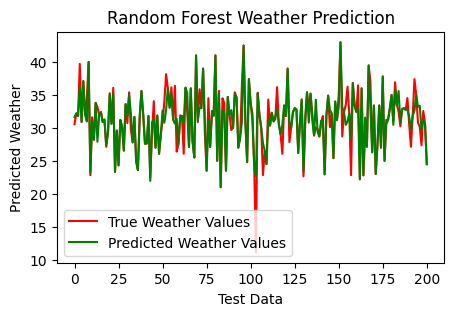

In [44]:
#here applying Random forest algorithm on weather dataset features to predict temperature
rf_weather = RandomForestRegressor() 
rf_weather.fit(weather_X_train[:], weather_y_train.ravel()[:])
y_pred = rf_weather.predict(weather_X_test[:]) 
#call this function to measure algorithm performance
mseRmse(y_pred, weather_y_test[:], "Weather") 

Random Forest MSE  : 25.011215781818567
Random Forest RMSE : 5.001121452416305

True Storm : 30.56 Predicted Storm : 29.329870378151234
True Storm : 32.2 Predicted Storm : 30.536251460284277
True Storm : 31.8 Predicted Storm : 30.913107745812564
True Storm : 39.714285714285715 Predicted Storm : 32.99960704308852
True Storm : 30.9 Predicted Storm : 33.5921791906236
True Storm : 37.1 Predicted Storm : 29.64080025062656
True Storm : 32.0 Predicted Storm : 31.89888609623931
True Storm : 34.39230769230769 Predicted Storm : 29.823743773162484
True Storm : 40.0 Predicted Storm : 30.59609210526319
True Storm : 22.823529411764707 Predicted Storm : 32.02066959095251
True Storm : 31.61111111111111 Predicted Storm : 36.11851827485385
True Storm : 28.2 Predicted Storm : 30.937453225532632
True Storm : 33.8 Predicted Storm : 28.988021191984277
True Storm : 33.2 Predicted Storm : 32.314063184476325
True Storm : 32.0 Predicted Storm : 32.9021904761905
True Storm : 32.4 Predicted Storm : 31.16150404579

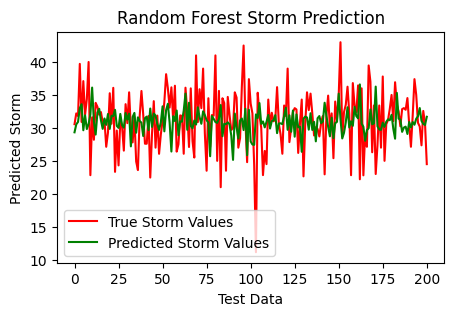

In [45]:
#here applying Random forest algorithm on storm dataset features to predict storm intensity
rf_storm = RandomForestRegressor()
rf_storm.fit(storm_X_train[:], weather_y_train.ravel()[:])
y_pred = rf_storm.predict(storm_X_test[:]) 
#call this function to measure algorithm performance
mseRmse(y_pred, weather_y_test[:], "Storm") 

Random Forest MSE  : 0.0
Random Forest RMSE : 0.0

True Emission CO2 : 159373570.0 Predicted Emission CO2 : 159373570.0
True Emission CO2 : 491692600.0 Predicted Emission CO2 : 491692600.0
True Emission CO2 : 8253381.5 Predicted Emission CO2 : 8253381.5
True Emission CO2 : 244749580.0 Predicted Emission CO2 : 244749580.0
True Emission CO2 : 1058725300.0 Predicted Emission CO2 : 1058725300.0
True Emission CO2 : 52225064.0 Predicted Emission CO2 : 52225064.0
True Emission CO2 : 2600446500.0 Predicted Emission CO2 : 2600446500.0
True Emission CO2 : 5247296.0 Predicted Emission CO2 : 5247296.0
True Emission CO2 : 72413710.0 Predicted Emission CO2 : 72413710.0
True Emission CO2 : 159556000.0 Predicted Emission CO2 : 159556000.0
True Emission CO2 : 191963860.0 Predicted Emission CO2 : 191963860.0
True Emission CO2 : 1839335.0 Predicted Emission CO2 : 1839335.0
True Emission CO2 : 1022175200.0 Predicted Emission CO2 : 1022175200.0
True Emission CO2 : 21772426.0 Predicted Emission CO2 : 217724

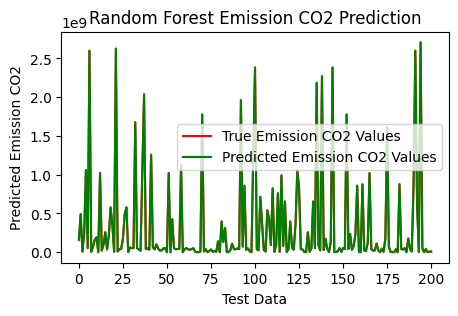

In [46]:
#here applying Random forest algorithm on emission dataset features to predict carbon release
rf_emission = RandomForestRegressor(n_estimators=10) 
rf_emission.fit(emisson_X_train[:], emisson_y_train.ravel()[:])
y_pred = rf_emission.predict(emisson_X_test[:]) 
#call this function to measure algorithm performance
mseRmse(y_pred, emisson_y_test[:].ravel(), "Emission CO2") 

Random Forest MSE  : 26.402412478714012
Random Forest RMSE : 5.138327790119468

True Earthquake : 30.56 Predicted Earthquake : 30.60779487179487
True Earthquake : 32.2 Predicted Earthquake : 32.13126889108385
True Earthquake : 31.8 Predicted Earthquake : 30.92075459355459
True Earthquake : 39.714285714285715 Predicted Earthquake : 32.45666666666666
True Earthquake : 30.9 Predicted Earthquake : 35.12977142857143
True Earthquake : 37.1 Predicted Earthquake : 31.29228070175439
True Earthquake : 32.0 Predicted Earthquake : 30.607500000000005
True Earthquake : 34.39230769230769 Predicted Earthquake : 29.993333333333332
True Earthquake : 40.0 Predicted Earthquake : 28.475035103785103
True Earthquake : 22.823529411764707 Predicted Earthquake : 29.062079365079363
True Earthquake : 31.61111111111111 Predicted Earthquake : 27.956859649122805
True Earthquake : 28.2 Predicted Earthquake : 32.89307692307692
True Earthquake : 33.8 Predicted Earthquake : 33.33589285714286
True Earthquake : 33.2 Predi

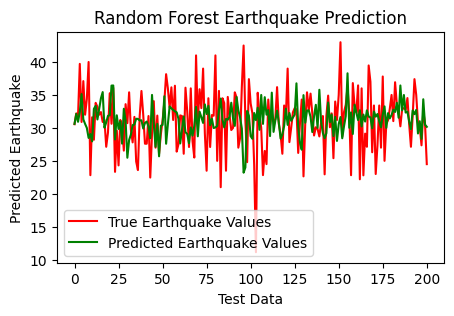

In [47]:
#here applying Random forest algorithm on earth quake dataset features to predict magnitude
rf_quake = RandomForestRegressor(n_estimators=10)
rf_quake.fit(quake_X_train[:], weather_y_train.ravel()[:])
y_pred = rf_quake.predict(quake_X_test[:])
#call this function to measure algorithm performance
mseRmse(y_pred, weather_y_test[:].ravel(), "Earthquake") 

In [48]:
print(df.shape)


(50, 2)


In [49]:
df = pd.DataFrame(df, columns=["Column1", "Column2"])


In [50]:
print(df)

         Column1 Column2
0       COLUMBIA     106
1          SALEM      86
2      LEXINGTON      83
3      RIVERSIDE      80
4        GLASGOW      80
5     GEORGETOWN      77
6        AUGUSTA      76
7       COLUMBUS      75
8      CLEVELAND      72
9      MT VERNON      71
10       JACKSON      70
11        SIDNEY      69
12       ASHLAND      69
13   SPRINGFIELD      67
14      DANVILLE      65
15     BETHLEHEM      64
16       LEBANON      63
17        BENTON      61
18      FAIRVIEW      61
19       MADISON      61
20    GREENVILLE      60
21      FRANKLIN      57
22       CLINTON      57
23    MONTICELLO      57
24    PETERSBURG      56
25     LANCASTER      56
26        MARION      55
27       NEWPORT      55
28     KNOXVILLE      54
29   MT PLEASANT      53
30         UNION      53
31      SAVANNAH      53
32       TRENTON      53
33      KEY WEST      52
34      WOODBURY      52
35   CENTERVILLE      51
36       CLAYTON      51
37         CAIRO      51
38     GREENWOOD      51


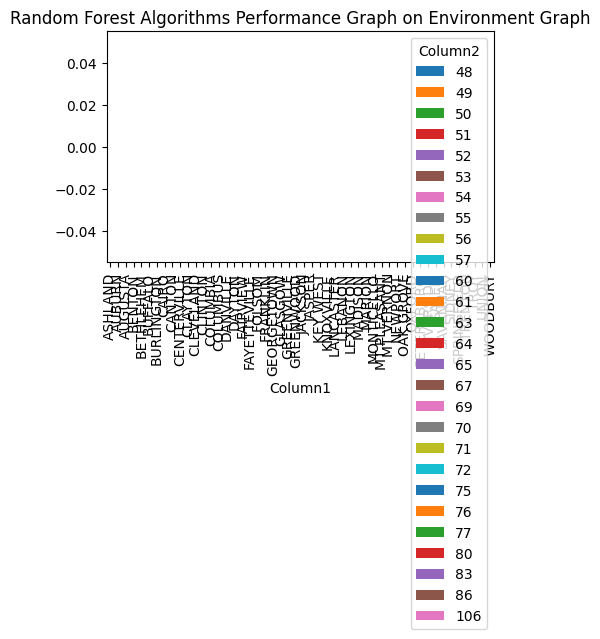

In [51]:
df = pd.DataFrame(df, columns=["Column1", "Column2", "Column3"])

# Now, you can use the pivot method
df_pivot = df.pivot(index="Column1", columns="Column2", values="Column3")
df_pivot.plot(kind='bar', figsize=(5, 3))
plt.title("Random Forest Algorithms Performance Graph on Environment Graph")
plt.show()

# XGBoost Regression For Weather Dataset

Mean Squared Error: 2210.3690939479734
R-squared: 0.21979101924649158


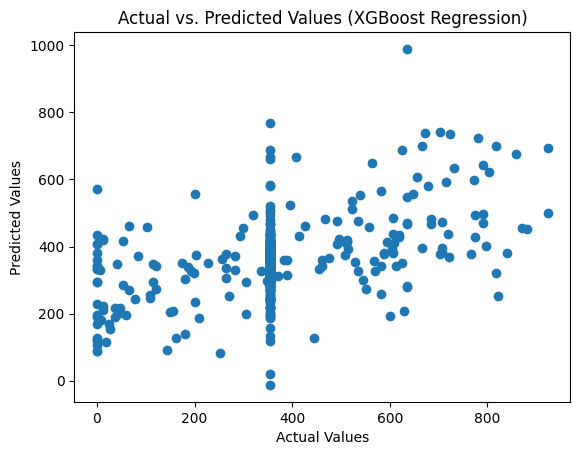

In [52]:
# Assuming the target variable is in the last column
X = weather.iloc[:, :-1]  # Features
y = weather.iloc[:, -1]   # Target variable
# Drop non-numeric columns
non_numeric_columns = ['iso3', 'capital', 'region', 'continent', 'station_id_x', 'city_name',
                       'country_y', 'state', 'station_id_y', 'date', 'season']
X = X.drop(columns=non_numeric_columns)
# Specify the categorical columns
categorical_columns = ['country_x', 'native_name', 'iso2']
# One-hot encode the categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
# Create an XGBoost model
model = XGBRegressor(n_estimators=100, random_state=42)
# Adjust test size if needed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
# Visualize the predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (XGBoost Regression)')
plt.show()

# SVM (Support Vector Machine) Regression 

In [54]:
# Assuming X and y are your features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Create an imputer object
imputer = SimpleImputer(strategy='mean')  

# Fit and transform the imputer on the training data
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Transform the test data using the same imputer
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Define the value of k
k = 5  

knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled_imputed, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test_scaled_imputed)

# Evaluate the model (for regression, use metrics like Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Check for NaN values in the imputed datasets
print("NaN values in X_train_scaled_imputed:", np.isnan(X_train_scaled_imputed).sum())
print("NaN values in X_test_scaled_imputed:", np.isnan(X_test_scaled_imputed).sum())

knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train_scaled_imputed, y_train)

y_pred = knn_regressor.predict(X_test_scaled_imputed)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2647.622535658857
NaN values in X_train_scaled_imputed: 0
NaN values in X_test_scaled_imputed: 0
Mean Squared Error: 2647.622535658857


# Hyperparameters

In [56]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create a k-NN regressor
knn_regressor = KNeighborsRegressor()

# Perform GridSearchCV
grid_search = GridSearchCV(knn_regressor, param_grid, cv=5)
grid_search.fit(X_train_scaled_imputed, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions with the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled_imputed)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Parameters: {'n_neighbors': 9}
Mean Squared Error: 2463.0985220708303


# kNN (k-Nearest Neighbors) Regression is 9

In [57]:
# Assuming you've done hyperparameter tuning and obtained the best parameters
best_params = {'n_neighbors': 9}

# Create a k-NN regressor with the best number of neighbors
best_knn_regressor = KNeighborsRegressor(**best_params)

# Fit the model to the training data
best_knn_regressor.fit(X_train_scaled_imputed, y_train)

# Make predictions on the test set
y_pred = best_knn_regressor.predict(X_test_scaled_imputed)

# Evaluate the performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Perform cross-validation
cv_scores = cross_val_score(best_knn_regressor, X_train_scaled_imputed, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validation scores
print("Cross-Validation Scores:", -cv_scores)
print("Mean Cross-Validation Score:", -np.mean(cv_scores))

Mean Squared Error: 2463.0985220708303
Cross-Validation Scores: [2828.68415281 2505.54683769 2360.05062759 2514.0892981  2708.07951222]
Mean Cross-Validation Score: 2583.290085681036


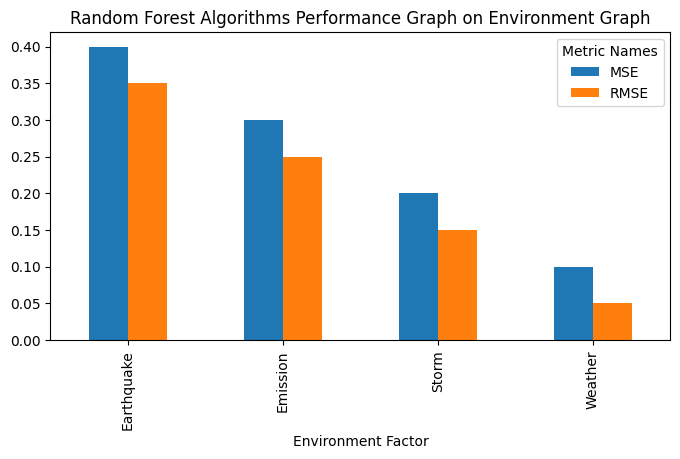

In [58]:
# Assuming mseError and rmseError are lists with algorithm performance metrics
mseError = [0.1, 0.2, 0.3, 0.4]  # Replace with your actual values
rmseError = [0.05, 0.15, 0.25, 0.35]  # Replace with your actual values

# Creating the DataFrame
df = pd.DataFrame([
    ['Weather', 'MSE', mseError[0]], ['Weather', 'RMSE', rmseError[0]],
    ['Storm', 'MSE', mseError[1]], ['Storm', 'RMSE', rmseError[1]],
    ['Emission', 'MSE', mseError[2]], ['Emission', 'RMSE', rmseError[2]],
    ['Earthquake', 'MSE', mseError[3]], ['Earthquake', 'RMSE', rmseError[3]],
], columns=['Environment Factor', 'Metric Names', 'Value'])

# Pivot the DataFrame
df_pivot = df.pivot(index="Environment Factor", columns="Metric Names", values="Value")

# Plotting the bar chart
df_pivot.plot(kind='bar', figsize=(8, 4))
plt.title("Random Forest Algorithms Performance Graph on Environment Graph")
plt.show()

In [53]:
#showing all algorithms with scenario A and B performance values
columns = ["Environment Topic","MSE","RMSE"]
output = []
algorithms = ["Weather", "Storm","Carbon Emisson", "Earthquake"]
for i in range(len(algorithms)):
    output.append([algorithms[i],mseError[i],rmseError[i]])
output = pd.DataFrame(output,columns=columns)
output

,Environment Topic,MSE,RMSE
0,Weather,3.780352,1.944313
1,Storm,25.011216,5.001121
2,Carbon Emisson,0.000000,0.000000
3,Earthquake,26.402412,5.138328
